In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
def get_time_data(file_path, column_name = 'elapsed time'):
    from pathlib import Path
    
    df_out = pd.DataFrame(columns=['number', 'tws size', column_name])

    with open(file_path, 'r') as file:
        for line in file.readlines():
            line_list = line.split()
            if line_list != []:
                if line_list[0] == 'tws':
                    line_temp = {'number' : [int(line_list[8])], 'tws size': [line_list[11]],  column_name:[line_list[2]] }
                    df_temp = pd.DataFrame(line_temp)
                    df_out = pd.concat([df_out, df_temp ])
    df_out.set_index("number", inplace=True)

    return df_out

In [50]:
df_basic = get_time_data('./time_results/results_det.txt',
                       "Zig Basic"
                    #    "Zig Optimized"
                       )

df_basic
             

,tws size,Zig Basic
number,,
0,4,15
1,5,28
2,7,30
3,9,37
4,11,39
5,13,52
6,16,53
7,20,81
8,23,79


In [51]:
df_opt = get_time_data('./time_results/results_opt.txt',
                     #   "elapsed"
                       "Zig Optimized"
                       )

print(df_opt.shape)
df_opt

(42, 2)


,tws size,Zig Optimized
number,,
0,4,16
1,5,20
2,7,20
3,9,16
4,11,36
5,13,33
6,16,45
7,20,49
8,23,56


In [52]:
df = df_basic.merge(df_opt)

# df.set_index('tws size', inplace=True)
print(df)
df_pivot = df.pivot(  columns=df.index, values=['Zig Basic', 'Zig Optimized'])
df_pivot

   tws size Zig Basic Zig Optimized
0         4        15            16
1         5        28            20
2         7        30            20
3         9        37            16
4        11        39            36
5        13        52            33
6        16        53            45
7        20        81            49
8        23        79            56
9        28        94            67
10       33       119           101
11       38       134            92
12       45       166           102
13       52       198           103
14       60       238           127
15       69       232           140
16       79       240           173
17       91       274           202
18      104       287           218
19      119       360           220
20      135       370           235
21      154       403           298
22      174       470           311
23      198       547           329
24      223       614           438
25      252       653           390
26      285       816       

KeyError: 0

KeyError: 'elapsed'

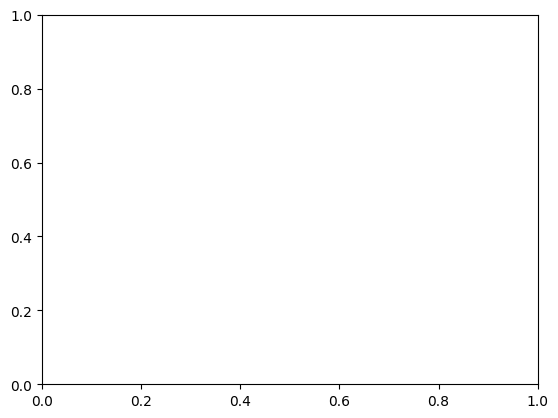

In [24]:
bar_width = 20 
opacity = 0.8


fig, ax = plt.subplots(1,1)
ax.plot(
        df_basic["tws size"].astype(int), 
        df_basic["elapsed"].astype(int), 
        # width=bar_width, 
        color='orange', 
        alpha=opacity, 
        # edgecolor='grey',
        marker='.',
        label='Basic',

        )

ax.plot(
        df_basic["tws size"].astype(int), 
        df_opt["elapsed"].astype(int),
        #  width=bar_width, 
        color='lightskyblue', 
        alpha=opacity, 
        #  edgecolor='grey',
        marker='.',
        label='Optimaized',
        )


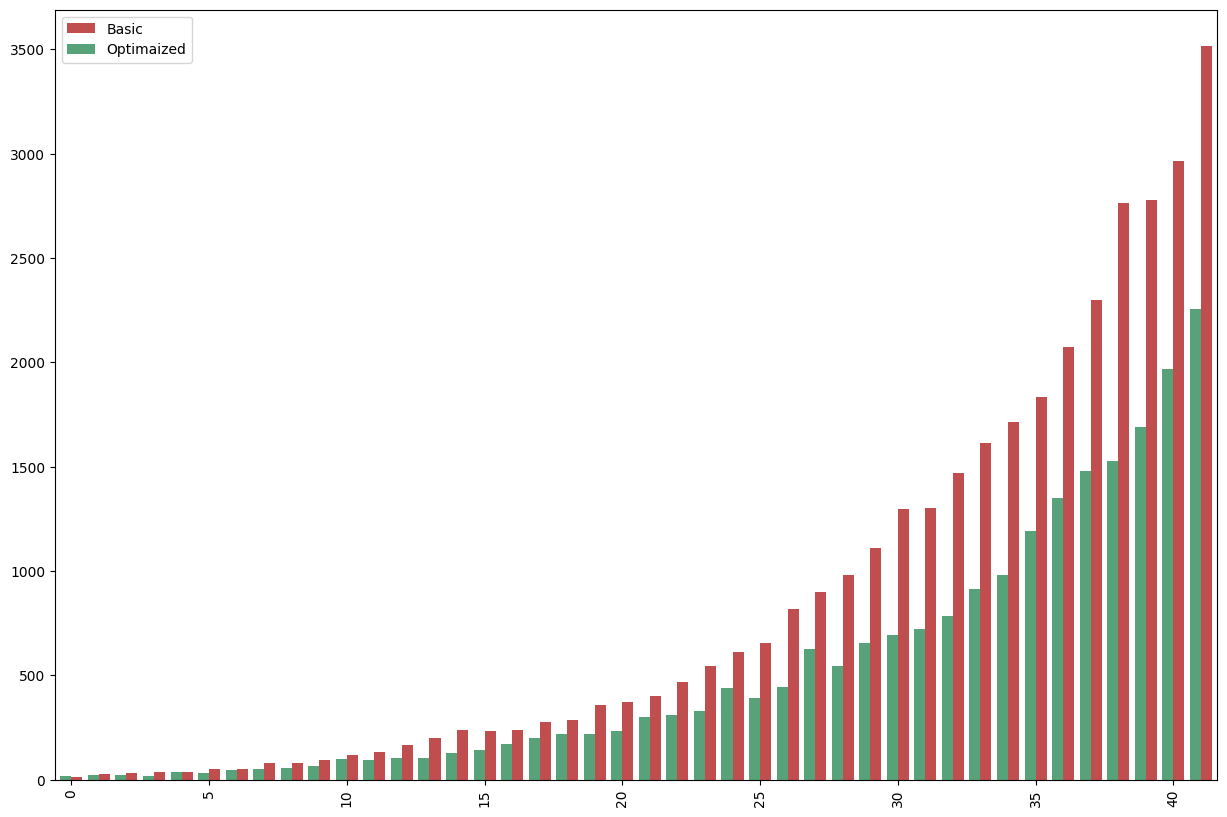

In [48]:
bar_width = .4
opacity = 0.8
bar_offset = 0
x_len = df_basic.shape[0]

x = np.arange(x_len) + bar_offset

fig, ax = plt.subplots(1,1, figsize=(15,10))

ax.bar(
        x + bar_width * .5 , 
        df_basic["elapsed"].astype(int), 
        width=bar_width, 
        color='firebrick',  
        alpha=opacity, 
        # edgecolor='grey', 
        label='Basic'
        )


ax.bar(
        x - bar_width * .5, 
        df_opt["elapsed"].astype(int),
        width=bar_width, 
        color='seagreen',  
        alpha=opacity, 
        # edgecolor='grey', 
        label='Optimaized')
# ax.semilogx()
ax.legend()
ax.set_xlim([-bar_width * 1.5 , x_len - bar_width ])
ax.tick_params(axis='x', labelrotation=90)
plt.show()
